In [1]:
import scipy.stats as stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import tabulate
import sys 
sys.path.insert(1,"./utils")
import models 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import sklearn
import patsy
import sklearn.linear_model as linear
import numpy.random as random
from collections import defaultdict
import sqlite3
from IPython.display import Image

## CoNVO

### Context  
  
Airbnb, as “Air Bed and Breakfast”, provides an online marketplace to allow property owners to rent out their spaces for people to stay. “Inside Airbnb” collects information on properties rented and data of renting activities from Airbnb. Its goals are to give insights on Airbnb business and improve property owners and renters' experiences during their uses of Airbnb. The Chief Executive Officer makes the business decision and report to the stakeholders.  
  
### Need  
  
Airbnb needs to improve the method to determine the listing price of a property for rent. Factors influencing the listing price need to be identified. Using the data collected by “Inside Airbnb” and other data sources, and building up a better model using these factors to predict the listing price of properties for rent, the company will generate more reasonable listing prices and this will attract more users including both property owners and renters.  
  
### Vision  
  
The Chief Executive Officer will get a set of spreadsheets that contain the data categorized by property information and renting activities based on transaction history. Models using different factors to predict listing prices of properties will be generated. The best model will be selected based on the evaluation.  
  
### Outcome  
  
Factors in the best model that predict listing prices will be focused in the future. Different aspects of these factors will be investigated and conresponding data will be collected for further exploration. A report of a discussion of factors impacting listing prices will be sent to the Chief Executive Officer and will be discussed at the next Business meeting. The results will be reported to stakeholders.  

## Question/Problem to Answer  
  
What factors determine listing price of properties for rent on Airbnb?  
  
## Target Variable  
  
**price**: Listing price of a property for rent

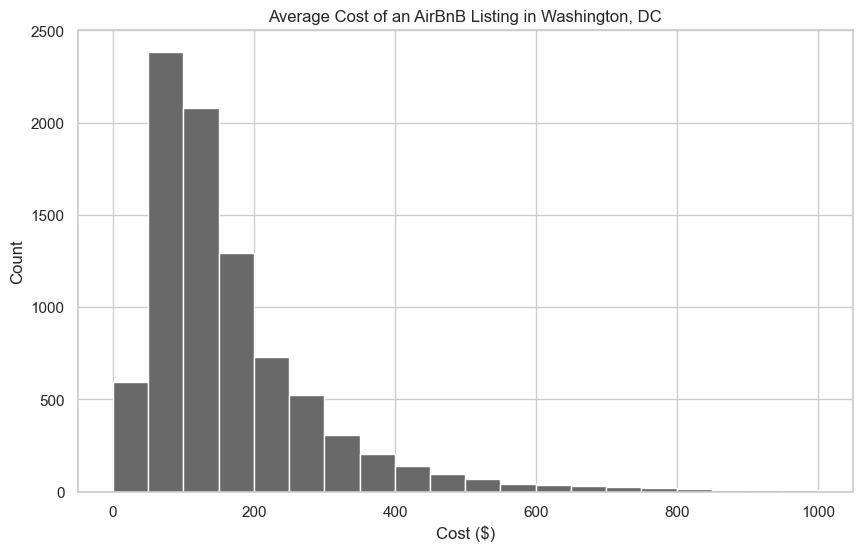

In [18]:
Image('./images/price_variable.png', width=700)

## Variables  
  
Variables available are generally information on the price, locaton, neighborhood, host's responses, reviews and property types.

"Inside AirBnB" provides access to AirBnB data from the past four quarters. The data are separated into three different .csv files:
- listings.csv: Includes detailed information about an AirBnB Listing
- reviews.csv: Contains review information, and `listing_id` key that maps to `id` in listings
- calendar.csv: Shows listing availability, mapping back to the listings.csv file using `listing_id`

Our analysis focused on variables contained within the listings.csv file. This file contained over 85 fields. Of these 85 fields, we identified 17 variables that we believed would affect the listing price of the AirBnb. Some of the excluded variables including host information, URLs, empty fields, large text-based entires, and redundant entires. Excluded variables are:
* Large text or descriptive fields
    * name, description, neighborhood_overview, amenities, host_about
* URLs, scraped data info, some host information:
    * listing_url, scrape_id, last_scraped, source, picture_url, host_id, host_url, host_name, host_since, host_location, host_thumbnail_url, host_picture_url, host_neighbourhood, host_listings_count, host_total_listings_count, host_has_profile_pic, host_identify_verified, license
* Empty/redundant fields
    * neighbourhood, neighbourhood_group_cleansed, latitude, longitue, bathrooms, number_of_reviews_ltm, number_of_reviews_l30d, first_review, last_review, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value, calculated_host_listings_count, calculated_host_listings_count_entire_homes, calcualted_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
* Time-based availability fields
    * minimum_nights, maximum_nights, minimum_minimum_nights, maximum_minimum_nights, minimum_maximum_nights, maximum_maximum_nights, minimum_nights_avg_ntm, maximum_nights_avg_ntm, calendar_updated, has_availability, availability_30, availability_60, availability_90, availability_365, calendar_last_scraped

The variables we chose to explore were:
* **price**: Listing price of a property for rent
* **bedrooms**: Number of bedrooms in a property
* **beds**: Number of beds in a property
* **accommodates**: Maximum capacity of a property
* **host_is_superhost**: Whether the host is a superhost which means 4.8 or higher average overall rating based on reviews
* **host_response_time**: Time range of host's response
* **host_response_rate**: Percentage of host's response
* **host_acceptance_rate**: Percentage of host's acceptance
* **room_type**: Type of room of a property
* **property_type**: Type of property
* **number_of_reviews**: Number of reviews of a property
* **review_scores_rating**: Scores of rated property based on reviews
* **reviews_per_month**: Average number of monthly reviews of a property
* **bathrooms_text**: Number of bathrooms in a property, and whether the bathrooms are private or shared
* **instant_bookable**: Whether instant booking is available
* **neighbourhood_cleansed**: Label of a neighborhood based on tax-assessed values

  
## Casual Loop Diagram (CLD)

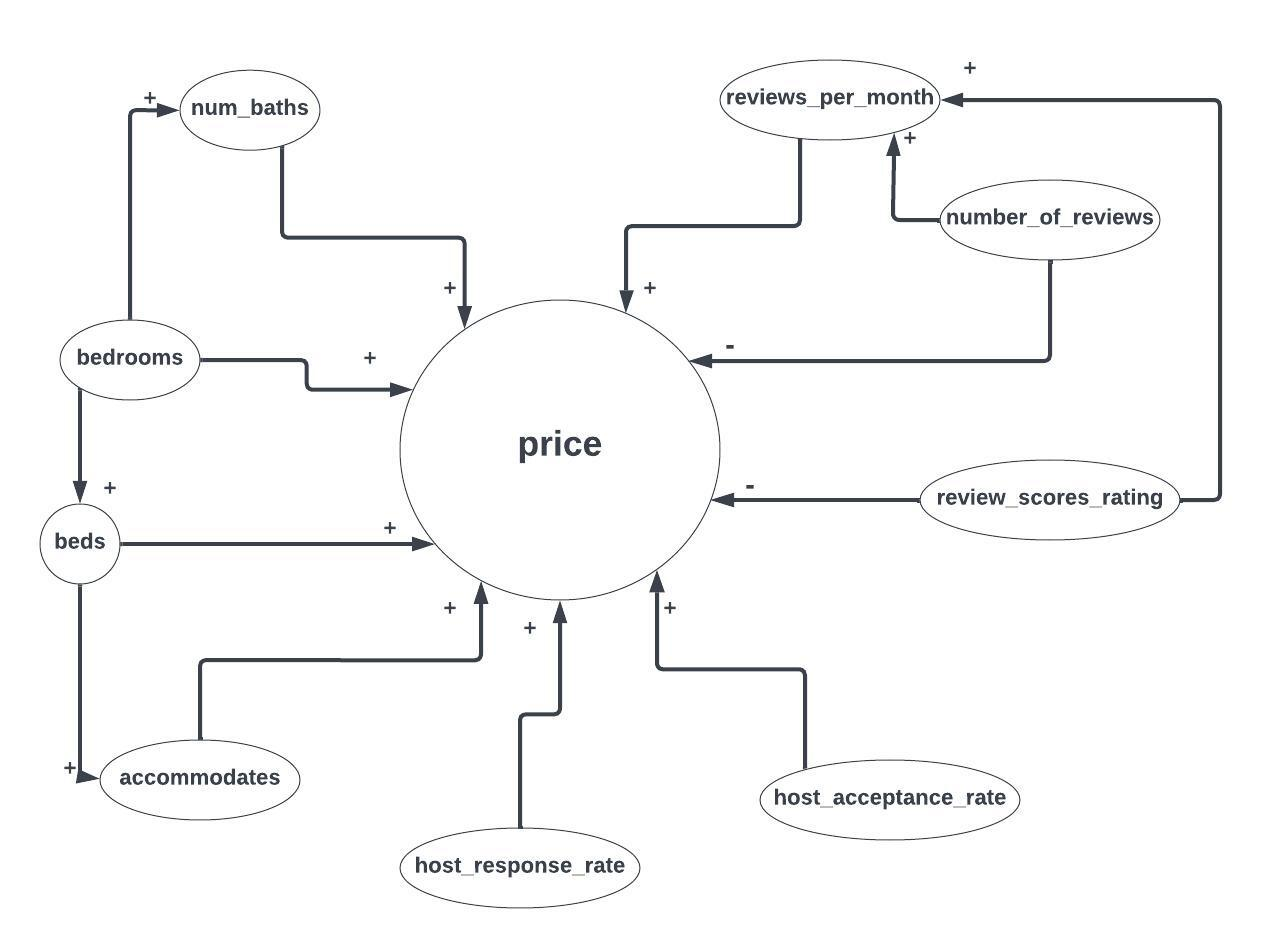

In [19]:
Image('./images/CLD_group4.jpeg', width=800)

Here are the summary of relationships between price and individual variables:

* **bedrooms**: as we saw in the EDA, there is a low positive relationship and that Spearman's suggests that the relationship may not be linear.
* **beds**: as we saw in the EDA, there is a low positive relationship and that Spearman's suggests that the relationship may not be linear.
* **accommodates**: as we saw in the EDA, there is a moderate positive relationship and that Spearman's suggests that the relationship may be linear.
* **host_is_superhost**: as we saw in the EDA, there is a very weak relationship and that Spearman's suggests that the relationship may not be linear.
* **host_response_time**: as we saw in the EDA, there is a very weak to low relationship and that Spearman's suggests that the relationship may not be linear.
* **host_response_rate**: as we saw in the EDA, there is a very weak positive relationship and that Spearman's suggests that the relationship may not be linear.
* **host_acceptance_rate**: as we saw in the EDA, there is a very weak positive relationship and that Spearman's suggests that the relationship may not be linear.
* **room_type**: as we saw in the EDA, there is a very weak to weak relationship and that Spearman's suggests that the relationship may or may not be linear.
* **property_type**: as we saw in the EDA, there is a very weak relationship and that Spearman's suggests that the relationship may not be linear.
* **number_of_reviews**: as we saw in the EDA, there is a very weak negative relationship and that Spearman's suggests that the relationship may not be linear.
* **review_scores_rating**: as we saw in the EDA, there is a very weak negative relationship and that Spearman's suggests that the relationship may not be linear.
* **reviews_per_month**: as we saw in the EDA, there is a very weak positive relationship and that Spearman's suggests that the relationship may not be linear.
* **num_baths**: as we saw in the EDA, there is a low positive relationship and that Spearman's suggests that the relationship may not be linear.
* **instant_bookable**: as we saw in the EDA, there is a very weak relationship and that Spearman's suggests that the relationship may not be linear.
* **neighborhood_label**: as we saw in the EDA, there is a very weak relationship and that Spearman's suggests that the relationship may not be linear.
* **bath_type**: as we saw in the EDA, there is a very weak relationship and that Spearman's suggests that the relationship may not be linear.  
  
## Interesting Variables  
  
We explored single variable distributions and pair-wise variables for their correlations with the target variable price in our EDA. The most interesting variables are those that have at least a low correlation (Pearson's Correlation Coefficient r >= 0.30) with the target variable price. They are:  
  
* **bedrooms**: The bedrooms variable is a numerical integer value. It represents the number of bedrooms of properties. More bedrooms generally corresponds to a higher capacity for overnight guests. 75% of AirBnB listings in the DC area contain two or fewer bedrooms. There is one AirBnB that has a maximum number of bedrooms of 15. The distribution of the number of bedrooms appears to be right-skewed. This makes sense, as one or two bedrooms may be common for most homes, with 3 or more bedrooms being less commons in homes, especially in a densely-populated area. There is a low positive relationship (r = 0.39) between bedrooms and price and that Spearman's suggests that the relationship may not be linear.  
  
* **beds**: The variable beds is a numerical integer value. It represents the number of beds in the AirBnb listed property. It may correlate with bedrooms since number of bedrooms usually equals to that of beds except for rare cases. Thus, we can say about 75% of AirBnB listings in the DC area contain two or fewer beds. There is one AirBnB that has a maximum number of beds of 15.  More beds generally corresponds to a higher capacity for overnight guests. There is a low positive relationship (r = 0.42) between beds and price and that Spearman's suggests that the relationship may not be linear.  
  
* **accommodates**: The accommodates variable is a numerical integer value. It represents the number of people who can stay in the AirBnb listed property. More accommodates generally corresponds to a higher capacity for overnight guests. 75% of AirBnB listings in the DC area are capable of accomodating 4 people. This unsurprisingly folows a similar pattern to both the beds and bedroom variables. The data are right-skewed. Even number accommodates values are more common, which makes sense given that one bed is often counted as accommodating 2 guests. There is a moderate positive relationship (r = 0.51) between accommodates and price and that Spearman's suggests that the relationship may be linear.  
  
* **num_baths**: The number of bathrooms in an AirBnB is a categorical value, since AirBnbs can have "shared" or "private" bathrooms. Additionally, there may be "half-baths" as well. The most common bathroom type for Airbnb is "1 bath". There is a low positive relationship (r = 0.47) between num_baths and price and that Spearman's suggests that the relationship may not be linear.  
  
## The *best* variables that worked out are: 

#### (1) **Accommodates**
##### Moderate positive relationship (r = 0.51) between accommodates and price.

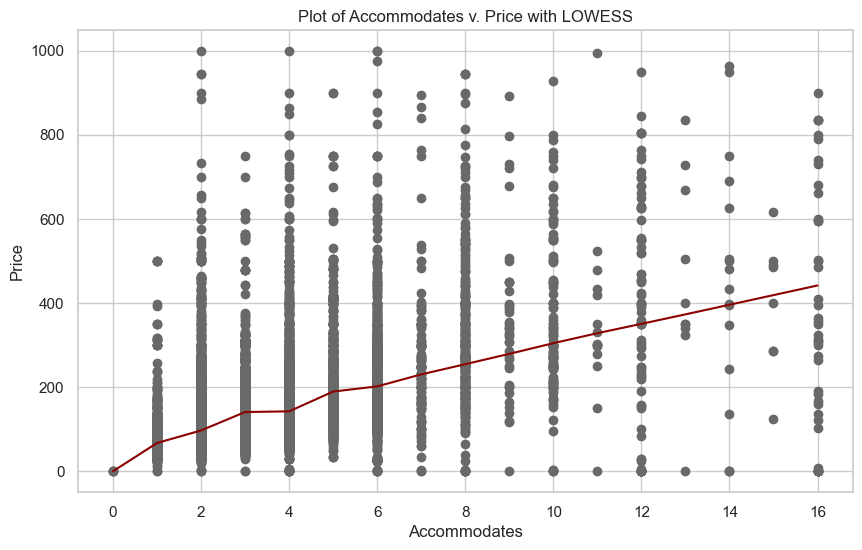

In [20]:
Image(filename="./images/accomodates_pairwise.png", width=700)

#### (2) **Number of Bathrooms**
##### Weak to moderate positive relationship (r = 0.47) between num_baths and price

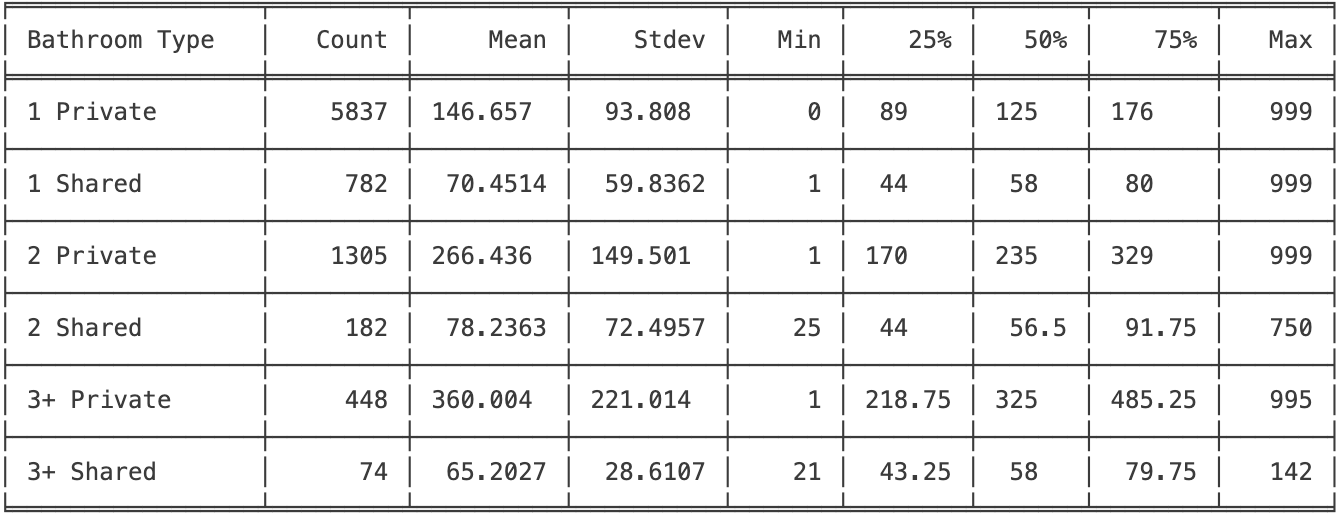

In [21]:
Image('./images/bath_table.png', width=700)

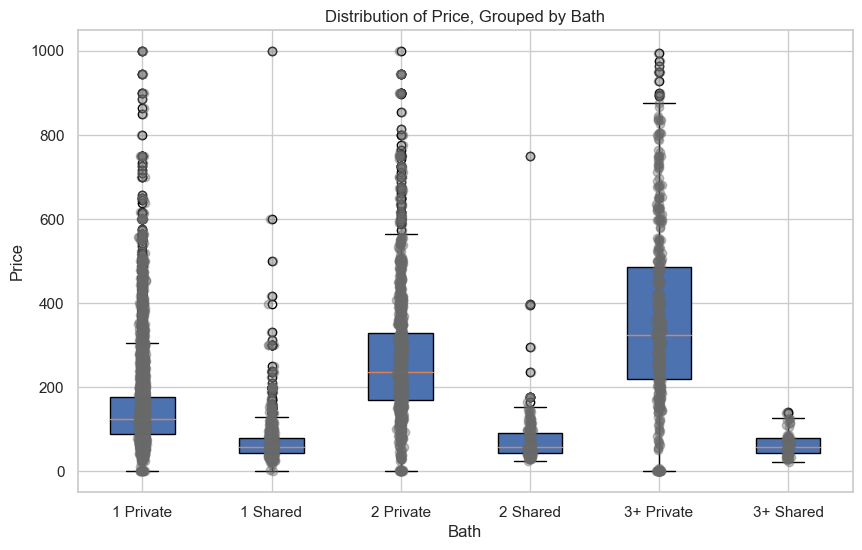

In [22]:
Image('./images/bathroom_pairwise.png', width=700)

</br>
For listings with private bathrooms, the prices tend to increase with more bathrooms. Listings that have shared bathrooms appear to have the same values, regardless of how many shared baths are available.

</br></br>


#### (3) **Number of Beds**: 
##### Weak to moderate positive relationship (r = 0.42) between number of beds and price.

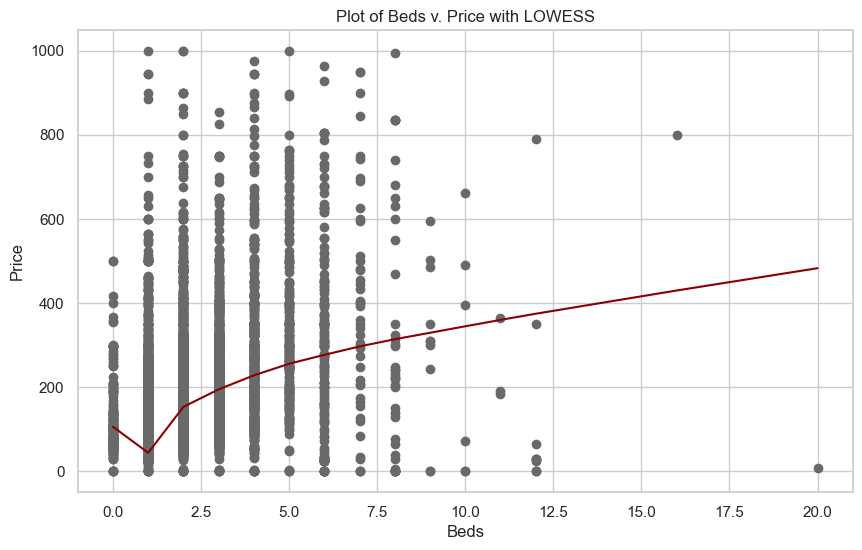

In [23]:
Image('./images/beds_pairwise.png', width=700)

For additional details and to review the full single and pairwise exploratory data analysis, please refer to the eda.ipynb file.

## Null Model / Baseline Model  
  
In reference to our EDA, there are 8626 listings between Q2 2022- Q1 2023 in Washington D.C. The average price of these AirBnBs is 166 US dollars with a standard deviation of 130 US dollars. The mininum price for a place is 0 dollars and the max is 999 dollars. We can definitely see a skew right since the median (130) < mean (166).  

As noted in our EDA, the distribution of this variable is skewed right and not normally distributed. It is important to understand the context of why the data is being generated like this. The data does not contains a "bell shaped curve" that is partly tied to the central limit theorem. That is, the average of the observations of this variable with finite moment and 2nd moment do not converges to the normal distribution as the number of sample increases. The data is postively skewed. That is the median of the observations is lower than the mean. There are more observations on the lower 50% percentile of the dataset than the upper 50% percentile. In this situaiton, there is no symmetry in the bell curve which violates the normality assumptions and takes us to transform the distribution we want to fit for our model. Since the data reflects the time of a pricing for a particular listing. This might be considered as the spatial time between events and it makes sense.  
  
### Data Generating Story  
  
The price listing of Airbnbs varies significantly based on the demand for that specific unit. With this said, it can be noted that the demand for Airbnbs is high for Airbnbs that are cheaper and there is gradually less demand for Airbnbs that are more expensive. However, it is important to note that there is a point in the Airbnbs where the demand is as low as expensive Airbnb. That is, Airbnbs that are too cheap, people do not want to rent this Airbnb. Thus, as mentioned, because these prices are within a timeframe and are independent from each other, this distribution is most likely an exponential distribution or a family of the exponential distribution.  

In order to create a mean model (null model), since the data is not normally distributed, we can use Chebyshev's inequality and note that at least %75 of the data must be within 2 standard deviations from the mean (k =2). In order to do this, the following are the steps taken to create a model: 

### Null Model / Baseline Model - Code

In [24]:
db_path = './datasets/datawarehouse.db'

In [25]:
con=sqlite3.connect(db_path)
cur = con.cursor()

query = '''SELECT id, CAST(REPLACE(price, '$', '') AS FLOAT) as avg_price
FROM listings;
'''

cur.execute(query)
con.commit()

price_arr = cur.fetchall()

con.close()

In [26]:
cost_arr = []
for pairs in price_arr:
    cost_arr.append(pairs[1])
price = pd.DataFrame(cost_arr, columns = ["price"])

In [27]:
#Describes the location and scale of the data observed
y_bar = np.mean(price)
std = np.std(price)

#ybar as yhat predicts the future values we will observe

y_hat = np. mean(price) 
y_std = np.std(price)


# Predictive model: Assuming a non- normally distributed variable and  giving our estimates some error bounds (75% probability interval): 
print(y_hat, "(", y_hat-2*y_std, ",", y_hat+2*y_std, ")")

price    166.803083
dtype: float64 ( price   -94.821243
dtype: float64 , price    428.427409
dtype: float64 )


It is important to note that values cannot be negative, therefore the bounds would be 0 to 428.43. This is too big of a range and not an appropiate model. We would predict that the mean listing price is 166.80 dollars. The standard deviation of the price using 75% error bounds is (-94.82, 428.43).  

## Final Model  

In [28]:
airBnb_csv = "./datasets/airbnb_selected_variables.csv"
airBnB = pd.read_csv(airBnb_csv)
airBnB['room_type'] = airBnB['room_type'].str.replace('/','_')
airBnB['room_type'] = airBnB['room_type'].str.replace(' ','_')
airBnB['host_response_time'] = airBnB['host_response_time'].str.replace(' ','_')

In [29]:
airBnB = pd.concat([airBnB, pd.get_dummies(airBnB["host_is_superhost"], prefix="superhost")], axis=1)
airBnB = pd.concat([airBnB, pd.get_dummies(airBnB["host_response_time"], prefix="host_response_time")], axis=1)
airBnB = pd.concat([airBnB, pd.get_dummies(airBnB["room_type"], prefix="room_type")], axis=1)
airBnB = pd.concat([airBnB, pd.get_dummies(airBnB["property_type"], prefix="property_type")], axis=1)
airBnB = pd.concat([airBnB, pd.get_dummies(airBnB["instant_bookable"], prefix="instant_bookable")], axis=1)
airBnB = pd.concat([airBnB, pd.get_dummies(airBnB["neighborhood_label"], prefix="neighborhood")], axis=1)
airBnB = pd.concat([airBnB, pd.get_dummies(airBnB["bathroom_type"], prefix="bath_type")], axis=1)

In [30]:
def log( x):
    return np.log(x) if x>0 else 0

airBnB[ "bedrooms_log"] = airBnB["bedrooms"].apply(log)
airBnB[ "beds_log"] = airBnB["beds"].apply(log)
airBnB[ "accommodates_log"] = airBnB["accommodates"].apply(log)
airBnB[ "num_baths_log"] = airBnB["num_baths"].apply(log)

airBnB[ "host_response_rate_log"] = airBnB["host_response_rate"].apply(log)
airBnB[ "host_acceptance_rate_log"] = airBnB["host_acceptance_rate"].apply(log)
airBnB[ "number_of_reviews_log"] = airBnB["number_of_reviews"].apply(log)
airBnB[ "review_scores_rating_log"] = airBnB["review_scores_rating"].apply(log)

In [31]:
model4 = "price ~ bedrooms_log + beds_log + accommodates_log + host_response_rate_log + host_acceptance_rate_log + number_of_reviews_log + review_scores_rating_log + num_baths_log + superhost_t + host_response_time_within_a_day + host_response_time_within_a_few_hours + room_type_Entire_home_apt + room_type_Private_room + property_type_apt + property_type_hotel + property_type_house + instant_bookable_t + neighborhood_high + bath_type_private + bedrooms:num_baths + bedrooms:accommodates"
result = models.bootstrap_linear_regression(model4, data=airBnB)
models.describe_bootstrap_lr(result)

,,,95% BCI</strong,
Coefficients</strong,,Mean</strong,Lo</strong,Hi</strong
,$\beta_{0}$,-14.80,-44.37,21.87
bedrooms_log,$\beta_{1}$,11.39,-0.48,22.13
beds_log,$\beta_{2}$,5.46,-1.16,12.70
accommodates_log,$\beta_{3}$,27.16,22.11,35.93
host_response_rate_log,$\beta_{4}$,-2.64,-4.76,-0.47
host_acceptance_rate_log,$\beta_{5}$,4.65,2.45,7.25
number_of_reviews_log,$\beta_{6}$,-4.85,-6.01,-3.34
review_scores_rating_log,$\beta_{7}$,-12.01,-15.94,-7.92
num_baths_log,$\beta_{8}$,116.32,88.42,130.60


Our final model to predict listing price of a property based on differen factors is:  
  
Model: price ~ bedrooms_log + beds_log + accommodates_log + host_response_rate_log + host_acceptance_rate_log + number_of_reviews_log + review_scores_rating_log + num_baths_log + superhost_t + host_response_time_within_a_day + host_response_time_within_a_few_hours + room_type_Entire_home_apt + room_type_Private_room + property_type_apt + property_type_hotel + property_type_house + instant_bookable_t + neighborhood_high + bath_type_private + bedrooms:num_baths + bedrooms:accommodates 
  
The final linear regression model of price contains 19 variables (bedrooms_log, beds_log, accommodates_log, host_response_rate_log, host_acceptance_rate_log, number_of_reviews_log, review_scores_rating_log, num_baths_log, superhost_t, host_response_time_within_a_day, host_response_time_within_a_few_hours, room_type_Entire_home_apt, room_type_Private_room, property_type_apt, property_type_hotel, property_type_house, instant_bookable_t, neighborhood_high, and bath_type_private) and 2 interaction terms (bedrooms:num_baths and bedrooms:accommodates).  
  
The $R^2$ is 39% which is ok. All the variables in the model make sense. The error of the regression ($\sigma$) is 102.23 compared to 130.82 in th null model.
  
What the model means:

* **bedrooms_log** - for every unit of log bedrooms, add 11.23 from price.
* **beds_log** - for every unit of log beds, add 5.46 from price. 
* **accommodates_log** - for every unit of log accomodates, add 27.16 from price.
* **host_response_rate_log** - for every unit of log host_response_rate, subtract 2.64 from price. 
* **host_acceptance_rate_log** - for every unit of log host_acceptance_rate, add 4.5 from price.
* **number_of_reviews_log** - for every unit of log number_of_reviews, subtract 4.85 from price.
* **review_scores_rating_log** - for every unit of log review_scores_rating, subtract 12.01 from price.
* **num_baths_log** - for every unit of log num_baths, add 116.32 from price.
* **superhost_t** - for every unit of superhost_t, add 16.44 from price.
* **host_response_time_within_a_day** - for every unit of host_response_time_within_a_day, subtract 12.36 from price.
* **host_response_time_within_a_few_hours** - for every unit of host_response_time_within_a_few_hours, subtract 31.49 from price.
* **room_type_Entire_home_apt** - for every unit of room_type_Entire_home_apt, add 84.23 from price.
* **room_type_Private_room** - for every unit of room_type_Private_room, add 52.24 from price.
* **property_type_apt** - for every unit of property_type_apt, add 50.14 from price.
* **property_type_hotel** - for every unit of property_type_hotel, add 186.49 from price.
* **property_type_house** - for every unit of property_type_house, add 38.04 from price.
* **instant_bookable_t** - for every unit of instant_bookable_t, add 8.16 from price.
* **neighborhood_high** - for every unit of neighborhood_high, add 18.56 from price.
* **bath_type_private** - for every unit of bath_type_private, add 9.57 from price.
* **bedrooms:num_baths** - for every unit of interacction between bedrooms and num_baths, subtract 4.73 from price.
* **bedrooms:accommodates** - for every unit of interacction between bedrooms and accomodates, add 2.46 from price.
 
From the null model, we know the $\sigma$ of this particular model was 130.82. The $\sigma$ for the model we came up with is 102.23. That is a significant improvement while keeping a $R^2$ of .39. 

## Prediction Examples  

### Prediction 1

In order to create predictions from the model, we must create a vector that simulates the circumstance for which we would want to predict the price. That is, if we want the price for a place that has:

1. Skip (1 is inserted for the intercept)
2. 2 bedrooms
3. 3 beds
4. 4 accomodates
5. 98 host_response_rate
6. 88 host_aceptantce_rate
7. 25 number of review
8. 4.8 review_scores_rating
9. 1 num_baths
10. Is a superhost. superhost_t = 1 (True)
11. host_response_time_within_a_day = 1 (True)
12. host_response_time_within_a_few_hours = 0 (False since responds within a day)
13. room_type_Entire_home_apt = 1 (True)
14. room_type_Private_room = 0 (False since room type is apt)
15. property_type_apt = 1 (True)
16. property_type_hotel = 0 (False since property type is apt)
17. property_type_house = 0 (False since property type is apt)
18. instant_bookable_t = 1 (True)
19. neighborhood_high = 1 (True)
20. bath_type_private = 1 (True)
21. bedrooms:num_baths = 2 ; 2 is the number of bedrooms and there is 1 bath (2x1 = 2)
22. bedrooms:accommodates 8; 2 is the number of bedrooms and there is room for 4 accomodate (2x4 = 8) 


In [32]:
prediction = result["model"].predict([[10,2,3,4,98,88,25,4.8,1,1,1,0,1,0,1,0,0,1,1,1,2,8]])
print(prediction)

[[272.68332955]]


We get an Airbnb that should cost around \\$272.68 dollars. Let's try another circumstance: 

1. Skip (1 is inserted for the intercept)
2. 1 bedroom
3. 2 beds
4. 4 accomodates
5. 98 host_response_rate
6. 88 host_aceptantce_rate
7. 25 number of review
8. 4.8 review_scores_rating
9. 2 num_baths
10. Is a superhost. superhost_t = 1 (True)
11. host_response_time_within_a_day = 0 (False since responds within hrs)
12. host_response_time_within_a_few_hours = 1 (True)
13. room_type_Entire_home_apt = 1 (True)
14. room_type_Private_room = 0 (False since room type is apt)
15. property_type_apt = 0 (False since property type is hotel)
16. property_type_hotel = 1 (True)
17. property_type_house = 0 (False since property type is hotel)
18. instant_bookable_t = 1 (True)
19. neighborhood_high = 0 (False)
20. bath_type_private = 1 (True)
21. bedrooms:num_baths = 6 ; 3 is the number of bedrooms and there is 2 bath (3x2 = 6)
22. bedrooms:accommodates = 9 ; 3 is the number of bedrooms and there is room for 3 accomodate (3x3 = 9) 

In [33]:
prediction2 = result["model"].predict([[10,1,2,4,98,88,25,4.8,1,1,0,1,1,0,0,1,0,1,0,1,6,9]])
print(prediction2)

[[338.03620013]]


We get an Airbnb that should cost around \\$338.04. Let's try another circumstance: 

1. Skip (1 is inserted for the intercept)
2. 1 bedrooms
3. 2 beds
4. 1 accomodates
5. 98 host_response_rate
6. 88 host_aceptantce_rate
7. 25 number of review
8. 4.8 review_scores_rating
9. 1 num_baths
10. Is a superhost. superhost_t = 1 (True)
11. host_response_time_within_a_day = 0 (False since responds within hrs)
12. host_response_time_within_a_few_hours = 1 (True)
13. room_type_Entire_home_apt = 0 (False)
14. room_type_Private_room = 1 (true)
15. property_type_apt = 0 (False since property type is hotel)
16. property_type_hotel = 1 (True)
17. property_type_house = 0 (False since property type is hotel)
18. instant_bookable_t = 1 (True)
19. neighborhood_high = 0 (False)
20. bath_type_private = 1 (True)
21. bedrooms:num_baths = 1 ; 1 is the number of bedrooms and there is 1 bath (1x1 = 1)
22. bedrooms:accommodates = 1 ; 1 is the number of bedrooms and there is room for 1 accomodate (1x1 = 1) 

In [34]:
prediction3 = result["model"].predict([[10,1,1,3,98,88,25,4.8,1,1,0,1,0,1,0,1,0,1,0,1,1,3]])
print(prediction3)

[[282.32152128]]


We get an Airbnb that should cost around \\$282.32.

The predictions seems to be appropriate. Therefore, our model seems acceptable to use as a means to predict rental listings.